# EDA

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BIA/Machine Learning/Dataset/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [ ]:
df["class"].value_counts() # checking records in Target dependent variable->Dataset is balanced

e    4208
p    3916
Name: class, dtype: int64

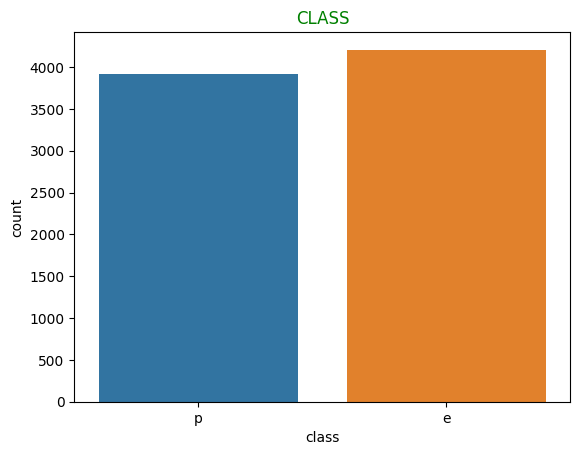

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt


sns.countplot (x="class", data = df)

plt.title("CLASS",color = "Green")

plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
df["class"].unique()

array([1, 0])

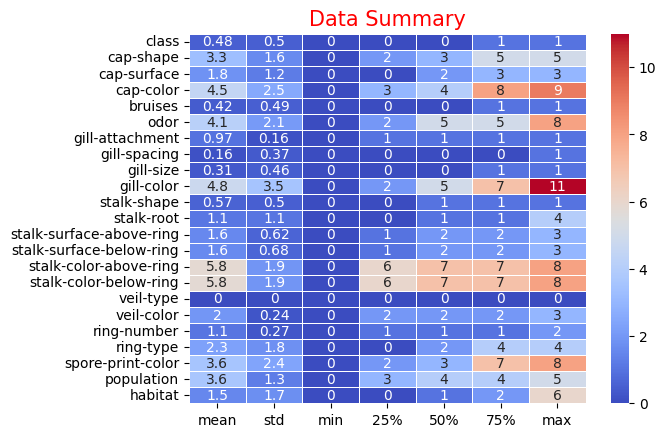

In [ ]:
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=.5,linecolor="white",cmap="coolwarm")
plt.title("Data Summary",fontsize=(15),color="red")
plt.show()

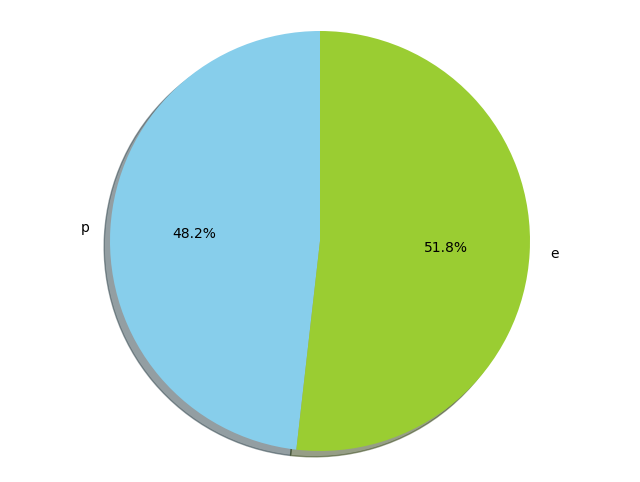

In [ ]:
p =len(df[df['class'] == 1])
e = len(df[df['class']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'p','e'
sizes = [p,e]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

In [ ]:
df.habitat.unique()


array([5, 1, 3, 0, 4, 6, 2])

<Axes: xlabel='habitat', ylabel='count'>

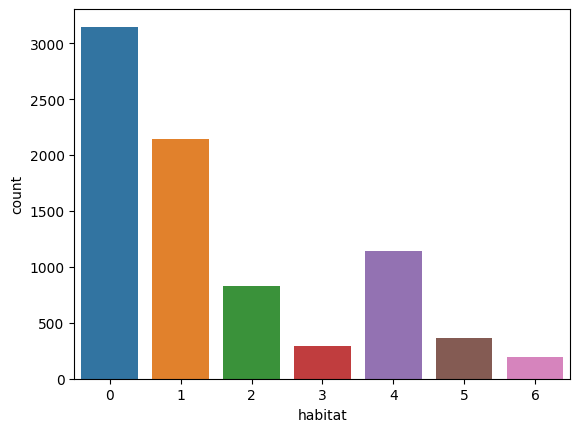

In [ ]:
sns.countplot (x="habitat", data = df)


# Model with KNN

In [12]:
X = df.drop(["class"],axis=1)
y = df["class"].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123,stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #it takes by default K=5 see it using ctr+i

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred=knn.predict(x_test)

# Accuracy with KNN

In [20]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

1.0

In [21]:
metrics.confusion_matrix(y_test,y_pred)

array([[1263,    0],
       [   0, 1175]])

In [ ]:
#comparing actual & predicted value

df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2433,0,0
2434,0,0
2435,0,0
2436,1,1


# Model with Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred=nb.predict(x_test)

# Accuracy with Naive Bayes


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[1170   93]
 [  97 1078]]


In [26]:
accuracy_score(y_test,y_pred)


0.9220672682526662

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1263
           1       0.92      0.92      0.92      1175

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438

